In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from data_preprocessing_final import cleaning, dummify_func, ord_enc_func

In [2]:
data = pd.read_csv('Ames_HousePrice.csv', index_col=0)
cleaned = cleaning(data)
x,y = ord_enc_func(cleaned)
x 

,PID,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,...,GarageFinish,GarageQual,PavedDrive,Fence,SaleCondition,MSSubClass,OverallQual,OverallCond,MoSold,YrSold
0,909176150,0.162726,0.030802,0.485507,0.000000,0.000000,0.333333,0.222222,0.25,0.382609,...,3.0,5.0,2.0,4.0,4.0,6.0,6.0,5.0,5.0,4.0
1,905476230,0.071918,0.013718,0.811594,0.566667,0.093125,0.333333,0.333333,0.00,0.773913,...,0.0,5.0,2.0,4.0,4.0,0.0,5.0,4.0,4.0,3.0
2,911128020,0.133562,0.022249,0.420290,0.950000,0.000000,0.333333,0.333333,0.00,0.304348,...,3.0,5.0,0.0,4.0,4.0,6.0,5.0,8.0,2.0,1.0
3,535377150,0.202055,0.031999,0.202899,0.883333,0.000000,0.333333,0.444444,0.00,0.391304,...,3.0,5.0,0.0,4.0,4.0,11.0,4.0,7.0,7.0,3.0
4,534177230,0.167808,0.033186,0.934783,0.850000,0.000000,0.500000,0.333333,0.00,0.921739,...,0.0,5.0,2.0,4.0,4.0,10.0,8.0,5.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,903205040,0.162726,0.035308,0.318841,0.000000,0.000000,0.333333,0.222222,0.25,0.182609,...,3.0,1.0,1.0,4.0,4.0,6.0,6.0,5.0,7.0,3.0
2575,905402060,0.162726,0.057865,0.601449,0.083333,0.000000,0.666667,0.444444,0.25,0.521739,...,3.0,5.0,2.0,4.0,4.0,5.0,3.0,4.0,8.0,3.0
2576,909275030,0.208904,0.023230,0.557971,0.000000,0.000000,0.666667,0.444444,0.00,0.469565,...,3.0,5.0,2.0,4.0,4.0,15.0,5.0,5.0,10.0,1.0
2577,907192040,0.162726,0.035177,0.927536,0.833333,0.090000,0.500000,0.444444,0.25,0.913043,...,0.0,5.0,2.0,4.0,4.0,10.0,7.0,4.0,9.0,1.0


In [3]:
y = y.SalePrice
y

0       126000
1       139500
2       124900
3       114000
4       227000
         ...  
2574    121000
2575    139600
2576    145000
2577    217500
2578    215000
Name: SalePrice, Length: 2579, dtype: int64

In [4]:
x = x.drop('PID', axis = 1)
x

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,...,GarageFinish,GarageQual,PavedDrive,Fence,SaleCondition,MSSubClass,OverallQual,OverallCond,MoSold,YrSold
0,0.162726,0.030802,0.485507,0.000000,0.000000,0.333333,0.222222,0.25,0.382609,0.268145,...,3.0,5.0,2.0,4.0,4.0,6.0,6.0,5.0,5.0,4.0
1,0.071918,0.013718,0.811594,0.566667,0.093125,0.333333,0.333333,0.00,0.773913,0.178763,...,0.0,5.0,2.0,4.0,4.0,0.0,5.0,4.0,4.0,3.0
2,0.133562,0.022249,0.420290,0.950000,0.000000,0.333333,0.333333,0.00,0.304348,0.145161,...,3.0,5.0,0.0,4.0,4.0,6.0,5.0,8.0,2.0,1.0
3,0.202055,0.031999,0.202899,0.883333,0.000000,0.333333,0.444444,0.00,0.391304,0.188844,...,3.0,5.0,0.0,4.0,4.0,11.0,4.0,7.0,7.0,3.0
4,0.167808,0.033186,0.934783,0.850000,0.000000,0.500000,0.333333,0.00,0.921739,0.354839,...,0.0,5.0,2.0,4.0,4.0,10.0,8.0,5.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,0.162726,0.035308,0.318841,0.000000,0.000000,0.333333,0.222222,0.25,0.182609,0.129032,...,3.0,1.0,1.0,4.0,4.0,6.0,6.0,5.0,7.0,3.0
2575,0.162726,0.057865,0.601449,0.083333,0.000000,0.666667,0.444444,0.25,0.521739,0.303763,...,3.0,5.0,2.0,4.0,4.0,5.0,3.0,4.0,8.0,3.0
2576,0.208904,0.023230,0.557971,0.000000,0.000000,0.666667,0.444444,0.00,0.469565,0.585349,...,3.0,5.0,2.0,4.0,4.0,15.0,5.0,5.0,10.0,1.0
2577,0.162726,0.035177,0.927536,0.833333,0.090000,0.500000,0.444444,0.25,0.913043,0.326613,...,0.0,5.0,2.0,4.0,4.0,10.0,7.0,4.0,9.0,1.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [6]:
y_train

287     372500
2409    187000
733     335000
512     253293
766     119000
         ...  
1033    108000
1731    112500
763     124000
835     114000
1653    153000
Name: SalePrice, Length: 1805, dtype: int64

In [8]:
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
gbm.score(X_test, y_test)

0.9308271293925807

In [10]:
abm = AdaBoostRegressor(n_estimators = 50)
abm.fit(X_train, y_train)
abm.score(X_test, y_test)

0.830321147296652

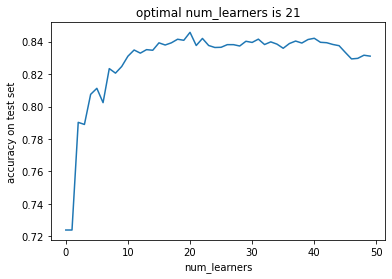

In [12]:
test_accs = []
for num_learners in range(1,51):
    # Train a boosting model on the dataset
    abm = AdaBoostRegressor(n_estimators=num_learners,random_state=0)
    abm.fit(X_train,y_train)

    # Calculate the accuracy on the test set
    test_accs.append(abm.score(X_test, y_test))

plt.plot(test_accs)
plt.xlabel('num_learners')
plt.ylabel('accuracy on test set')
opt_num_learners = range(1,51)[np.argmax(test_accs)]
plt.title('optimal num_learners is {}'.format(opt_num_learners))
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#params = {'learning_rate':[.05, .01, .001],'max_depth':[1,2,3],'n_estimators':[100,1000,10000]}

#gbm = GradientBoostingRegressor()
#grid_search = GridSearchCV(gbm,params)
#grid_search.fit(X_train,y_train)

#grid_search.best_params_

In [8]:
gbm = GradientBoostingRegressor(n_estimators = 10000)
gbm.fit(X_train, y_train)
gbm.score(X_test, y_test)

0.9334757893936498

In [9]:
gbm = GradientBoostingRegressor(n_estimators = 1000)
gbm.fit(X_train, y_train)
gbm.score(X_test, y_test)

0.9354183006319086

In [11]:
gbm = GradientBoostingRegressor(n_estimators = 1000, max_depth = 2)
gbm.fit(X_train, y_train)
gbm.score(X_test, y_test)

0.9393858782029334

In [16]:
gbm = GradientBoostingRegressor(n_estimators = 1000, max_depth = 2, learning_rate = .2)
gbm.fit(X_train, y_train)
gbm.score(X_test, y_test)

0.9352506373583803

In [17]:
gbm = GradientBoostingRegressor(n_estimators = 1000, max_depth = 2)
gbm.fit(X_train, y_train)
gbm.score(X_test, y_test)

0.938591495714592

In [19]:
sorted_importance = sorted(zip(X_train.columns, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('TotalLivArea', 0.5271896760114058),
 ('YearBuilt', 0.11042719345157179),
 ('OverallQual', 0.10825180310567392),
 ('BsmtQual', 0.03541820028445101),
 ('GarageArea', 0.03248380648081506),
 ('Fireplaces', 0.027740236608257602),
 ('ExterQual', 0.022890998944598718),
 ('MasVnrArea', 0.017717546649551642),
 ('KitchenQual', 0.015630531265067638),
 ('LotArea', 0.01377744477132901),
 ('OverallCond', 0.01088811263998855),
 ('GarageType', 0.00960025067036569),
 ('YearRemodAdd', 0.009016657514943842),
 ('Bsmt_Unfin_Ratio', 0.008584114306613112),
 ('BsmtExposure', 0.004484677699658717),
 ('Neighborhood', 0.00448049232715878),
 ('TotRmsAbvGrd', 0.0044350077385061065),
 ('LotFrontage', 0.0034343425539371383),
 ('SaleCondition', 0.003414214038248827),
 ('BsmtFinType1', 0.002624887131041573),
 ('WoodDeckSF', 0.0023720157665486903),
 ('MSSubClass', 0.002221503487389629),
 ('CentralAir', 0.002218994384547647),
 ('OpenPorchSF', 0.0019429250364060783),
 ('MSZoning', 0.0018217878957439205),
 ('BldgType',